In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("titanic.xls")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [4]:
data.drop(['body','name','home.dest'], 1, inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN


In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data["age"].fillna(data["age"].median(), inplace=True)
data["fare"].fillna(data["fare"].median(), inplace=True)
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.281086
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


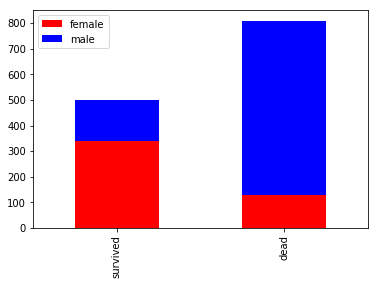

In [7]:
import matplotlib.pyplot as plt
colors = ["r", "b","k"]
survived_ = data[data["survived"]== 1]["sex"].value_counts()
dead_ = data[data["survived"]==0]["sex"].value_counts()
data_ = pd.DataFrame([survived_, dead_])
data_.index = ["survived","dead"]
data_.plot.bar(stacked=True,color=colors)
plt.show()
plt.close()

/Users/euclid/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


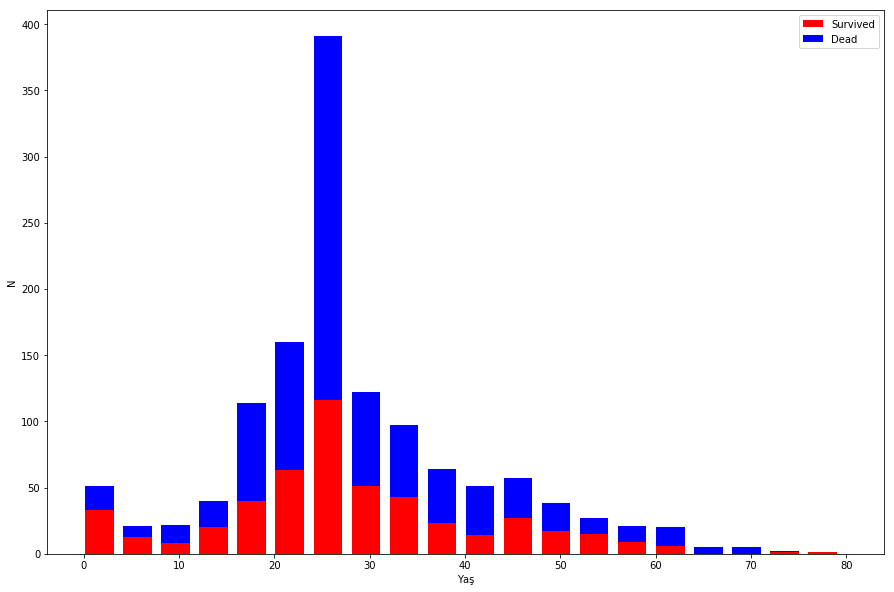

In [8]:
fig = plt.figure(figsize=(15,10))
plt.hist([data[data["survived"]==1]["age"], data[data["survived"]==0]["age"]],histtype='bar',stacked=True,bins=20,color=["r","b"],width=3, label=["Survived","Dead"])
plt.xlabel("Yaş")
plt.ylabel("N")
plt.legend()
plt.show()
plt.close()

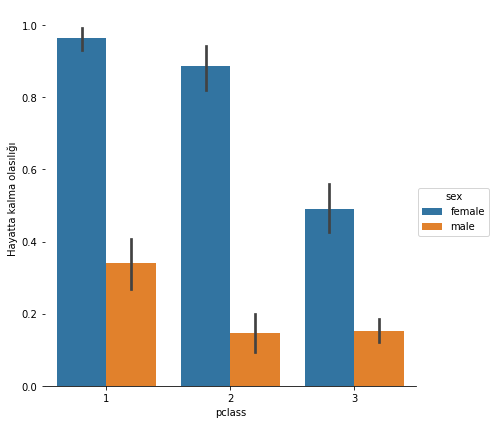

In [9]:
import seaborn as sns
g = sns.factorplot(x="pclass", y="survived", hue="sex", data=data, size=6, kind="bar")
g.despine(left=True)
g.set_ylabels("Hayatta kalma olasılığı")
plt.show()
plt.close()

In [10]:
sex = pd.get_dummies(data["sex"],drop_first=True)
embark = pd.get_dummies(data["embarked"],drop_first=True)

In [11]:
data_ = pd.concat([data, sex, embark], axis=1)
data_.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,male,Q,S
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,0,0,1
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,1,0,1
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0,0,1
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,1,0,1
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0,0,1


In [12]:
data_.drop(["sex","embarked","ticket","cabin","boat"], axis=1, inplace=True)
data_.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [13]:
X = data_.drop("survived", axis=1)
y = data_["survived"]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/euclid/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
prediction = lr.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       246
          1       0.76      0.67      0.71       147

avg / total       0.79      0.80      0.79       393



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[214,  32],
       [ 48,  99]])